In [108]:
import imageio
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.measure import label
from skimage.io import imread

import pickle as pkl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

In [98]:
def create_gif(images, output_path, duration=0.1):
    with imageio.get_writer(output_path, mode='I', duration=duration) as writer:
        for image_path in images:
            image = imageio.imread(image_path)
            writer.append_data(image)

In [99]:
raw_image_samples = [
    "Thousand_highmag_256slices_2kcenter_1k_inv_0204",
    "Thousand_highmag_256slices_2kcenter_1k_inv_0205",
    "Thousand_highmag_256slices_2kcenter_1k_inv_0206",
    "Thousand_highmag_256slices_2kcenter_1k_inv_0207",
]

In [100]:
def make_gif_for_sample(sample_name):
    images = ["sample_predictions/"+x for x in os.listdir("sample_predictions") if sample_name in x and "pred_" in x]
    image_df = pd.DataFrame({"images": images})
    image_df["epoch"] = image_df["images"].apply(lambda x: int(x.split("epoch_")[1].split("_")[0]))
    image_df = image_df.sort_values(by=['epoch'])
    
    output_path = sample_name+'.gif'
    create_gif(list(image_df["images"][:10]), output_path, 1)

In [76]:
for raw_image in raw_image_samples:
    make_gif_for_sample(raw_image)


/var/folders/4d/df9wpkr53dd86q9y627dc65r0000gn/T/ipykernel_34943/728498308.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)
/var/folders/4d/df9wpkr53dd86q9y627dc65r0000gn/T/ipykernel_34943/728498308.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)
/var/folders/4d/df9wpkr53dd86q9y627dc65r0000gn/T/ipykernel_34943/728498308.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `impo

In [10]:
# Example usage



/var/folders/4d/df9wpkr53dd86q9y627dc65r0000gn/T/ipykernel_31777/728498308.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)


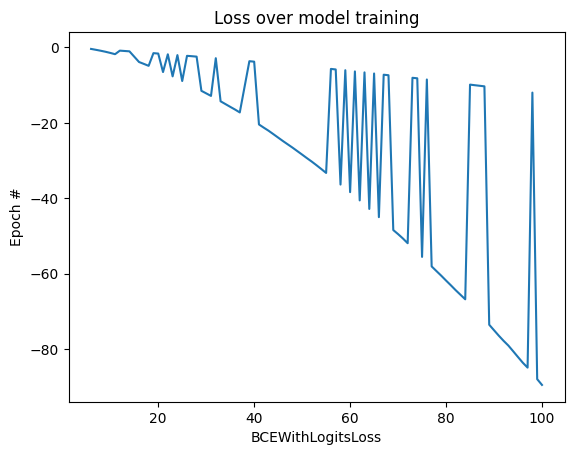

In [103]:
# Using readlines()
loss_data = {}
with open("training.txt", 'rb') as f:
    lines = f.readlines() 
    for line in lines:
        line = str(line)
        epoch = int(line.split("/100")[0].split(" ")[-1])
        loss = float(line.split("Loss: ")[1].split(" ")[0])
        loss_data[epoch] = loss
loss_df = pd.DataFrame({"epoch": list(loss_data.keys()), "loss": list(loss_data.values())})
loss_df = loss_df.sort_values(by=['epoch'])
plt.plot(loss_df["epoch"], loss_df["loss"])
plt.xlabel("BCEWithLogitsLoss")
plt.ylabel("Epoch #")
plt.title("Loss over model training")
plt.show()


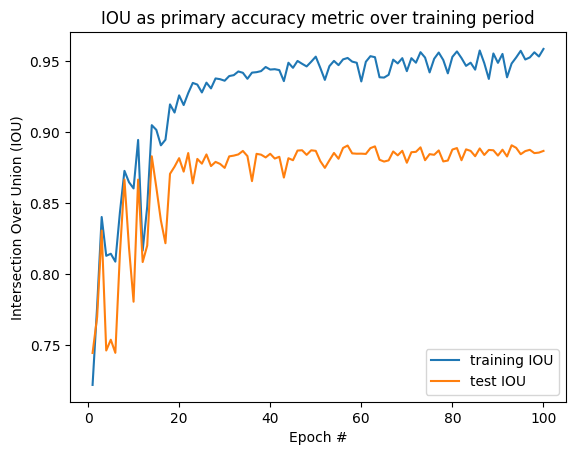

In [107]:
model_train_iou = pd.read_csv('model_train_iou.csv')
model_train_iou["epoch"] = model_train_iou["checkpoint"].apply(lambda x: int(x.split("_")[-1].split(".")[0]))
model_train_iou = model_train_iou.sort_values(by=['epoch'])

model_test_iou = pd.read_csv('model_test_iou.csv')
model_test_iou["epoch"] = model_test_iou["checkpoint"].apply(lambda x: int(x.split("_")[-1].split(".")[0]))
model_test_iou = model_test_iou.sort_values(by=['epoch'])


plt.plot(model_train_iou["epoch"], model_train_iou["iou"])
plt.plot(model_test_iou["epoch"], model_test_iou["iou"])
plt.xlabel("Epoch #")
plt.ylabel("Intersection Over Union (IOU)")
plt.title("IOU as primary accuracy metric over training period")
plt.legend(["training IOU", "test IOU"])
plt.show()

In [44]:
model_train_iou

,Unnamed: 0,checkpoint,iou,epoch
60,60,seg_checkpoints/model_epoch_1.pth,0.722124,1
99,99,seg_checkpoints/model_epoch_2.pth,0.777370,2
96,96,seg_checkpoints/model_epoch_3.pth,0.840440,3
77,77,seg_checkpoints/model_epoch_4.pth,0.813092,4
98,98,seg_checkpoints/model_epoch_5.pth,0.814541,5
...,...,...,...,...
12,12,seg_checkpoints/model_epoch_96.pth,0.951406,96
90,90,seg_checkpoints/model_epoch_97.pth,0.952852,97
10,10,seg_checkpoints/model_epoch_98.pth,0.956467,98
73,73,seg_checkpoints/model_epoch_99.pth,0.953512,99


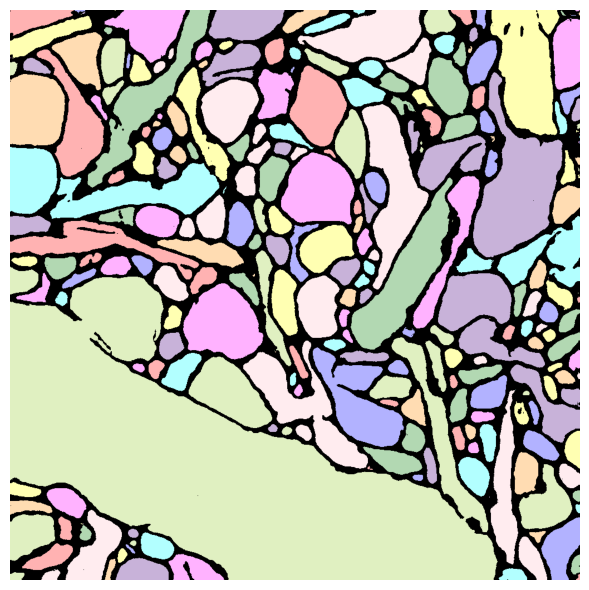

In [95]:
example_image = "sample_predictions/pred_epoch_64_Thousand_highmag_256slices_2kcenter_1k_inv_0204.png"
image = imread(example_image)

label_image = label(image)

image_label_overlay = label2rgb(label_image, image=image, bg_label=0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [89]:
with open('test.pkl','wb') as f:
     ...:     pickle.dump(arr, f)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)